In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The group includes three species of irises based on their four characteristics: sepal length, sepal length, petal length, and petal length.

In [ ]:
iris = load_iris()

In [ ]:
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

feature_names: 'sepal length (cm)', 'sepal width (cm)',
  'petal length (cm)', 'petal width (cm)'

target: 'setosa' = 0, 'versicolor' = 1, 'virginica' = 2



In [ ]:
X = iris.data
y = iris.target

In [ ]:
# Creating a DataFrame
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

df['target'] = df['target'].map({i: target_name for i, target_name in enumerate(iris.target_names)})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Let's look at the size of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


150 values, no missing values. The target value is a categorical variable, we will encode it

In [ ]:
#Let's look at descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are no strong scatters in the average values; it is not enough to normalize and standardize the data

In [ ]:
#Duplicates
df.duplicated().sum()

1

In [ ]:
#Let's remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Let's look at the number of objects in classes
df['target'].value_counts()

target
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

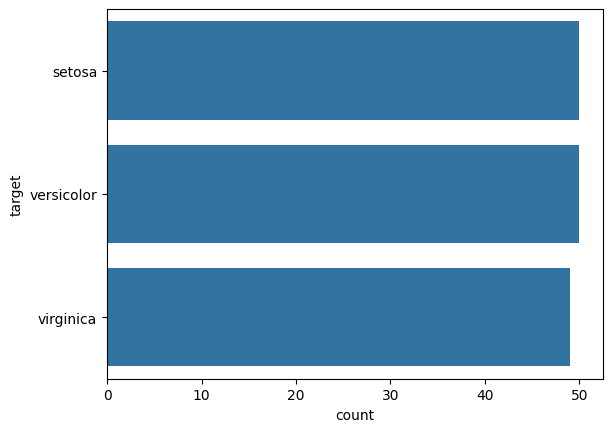

In [ ]:
sns.countplot(y="target", data=df)
plt.show()

##Visualisation

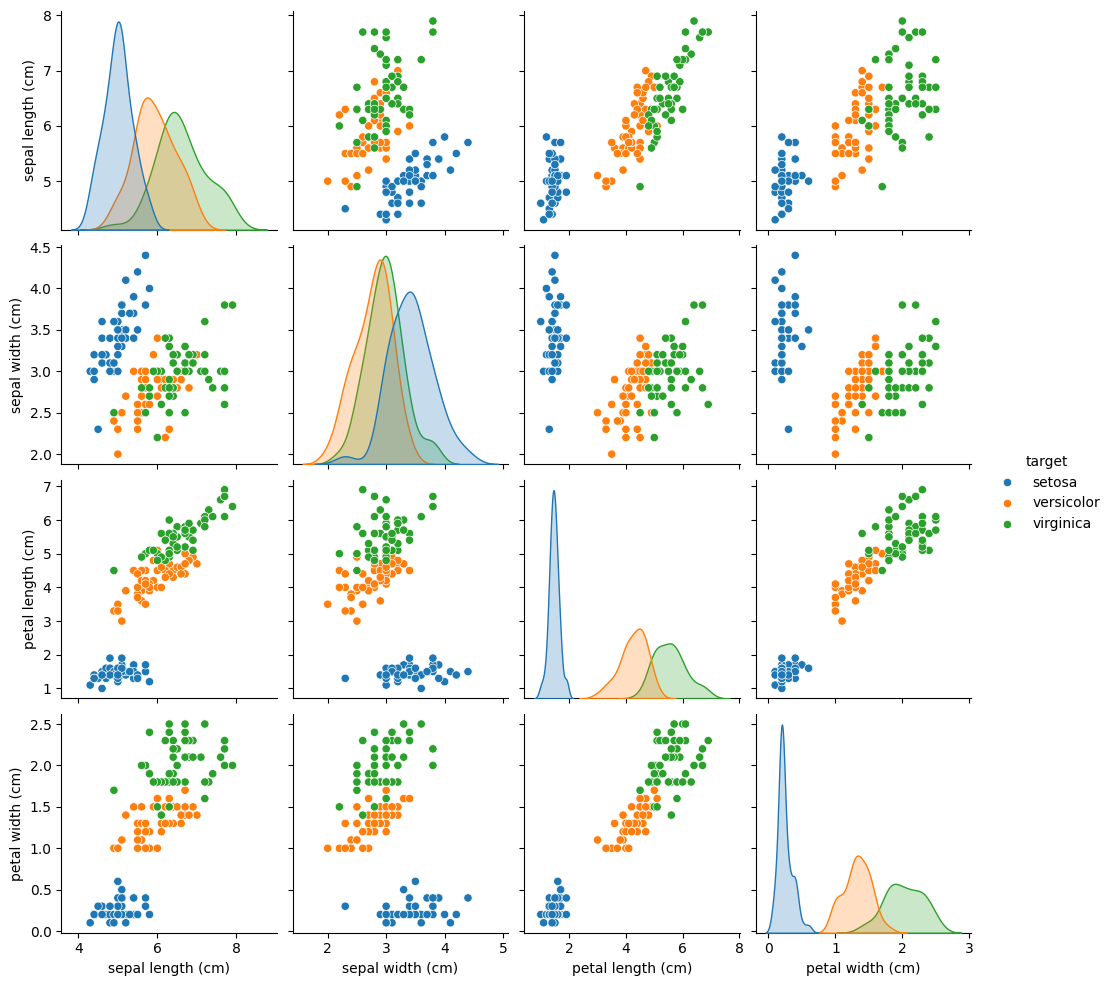

In [ ]:
sns.pairplot(df, hue='target')

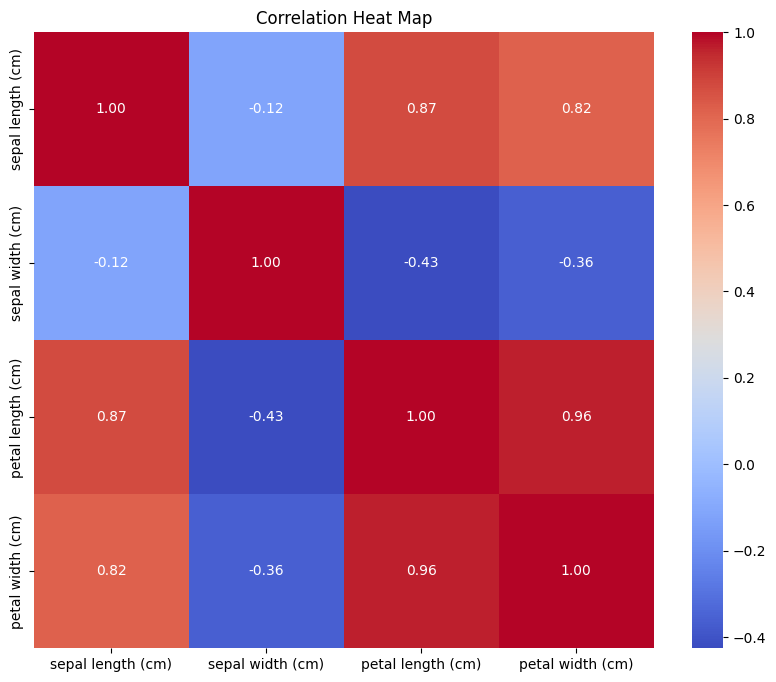

In [ ]:
#Creating a Correlation Matrix
df_numeric = df.drop(columns=['target'])
correlation_matrix = df_numeric.corr()

#Building a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map')
plt.show()

Since target values ​​are categorical, we will use LabelEncoder to convert them to numeric form

In [ ]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

##Model RandomForestClassifier

In [ ]:
y = df['target']
X = df.drop(columns='target',axis=1)

In [ ]:
#Dividing data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training a Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Prediction on the test set
y_pred = model.predict(X_test)


In [ ]:
#Assessing model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 1.0


In [ ]:
#Classification report
class_names = iris.target_names
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Model LogisticRegression

In [ ]:
#Training a Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

#Prediction
y_pred_logreg = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Assessing model accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print("model accuracy:", accuracy)

model accuracy: 1.0


In [ ]:
#Report
class_names = iris.target_names
print("Report:")
print(classification_report(y_test, y_pred_logreg, target_names=class_names))

Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

